## Assignment-4
### Cluster and Classification

#### Name : Ahamed Basheer M
#### Register No : 311519106003
#### Team ID : PNT2022TMID27859
#### Project Name : University Admit Eligibility Predictor

## 1.Downloaded and loaded the Dataset

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2.Load the dataset

In [144]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Perform Below Visualizations.

#### Univariate Analysis

<AxesSubplot: >

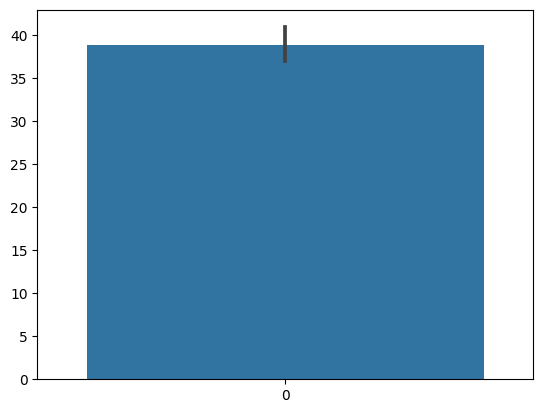

In [145]:
sns.barplot(data.Age)

#### Bivariate Analysis

<AxesSubplot: xlabel='Age', ylabel='Gender'>

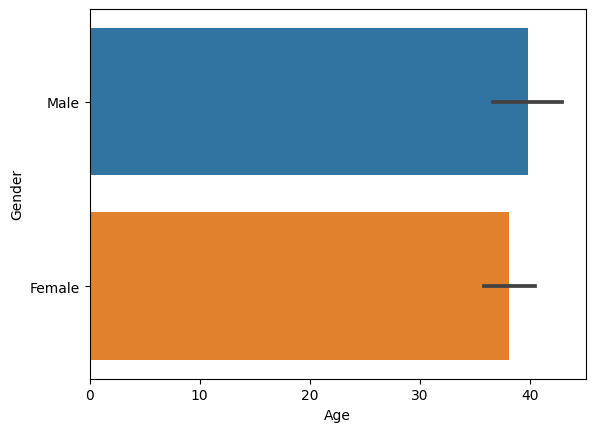

In [146]:
sns.barplot(x=data.Age,y=data.Gender)


#### Multivariate Analysis

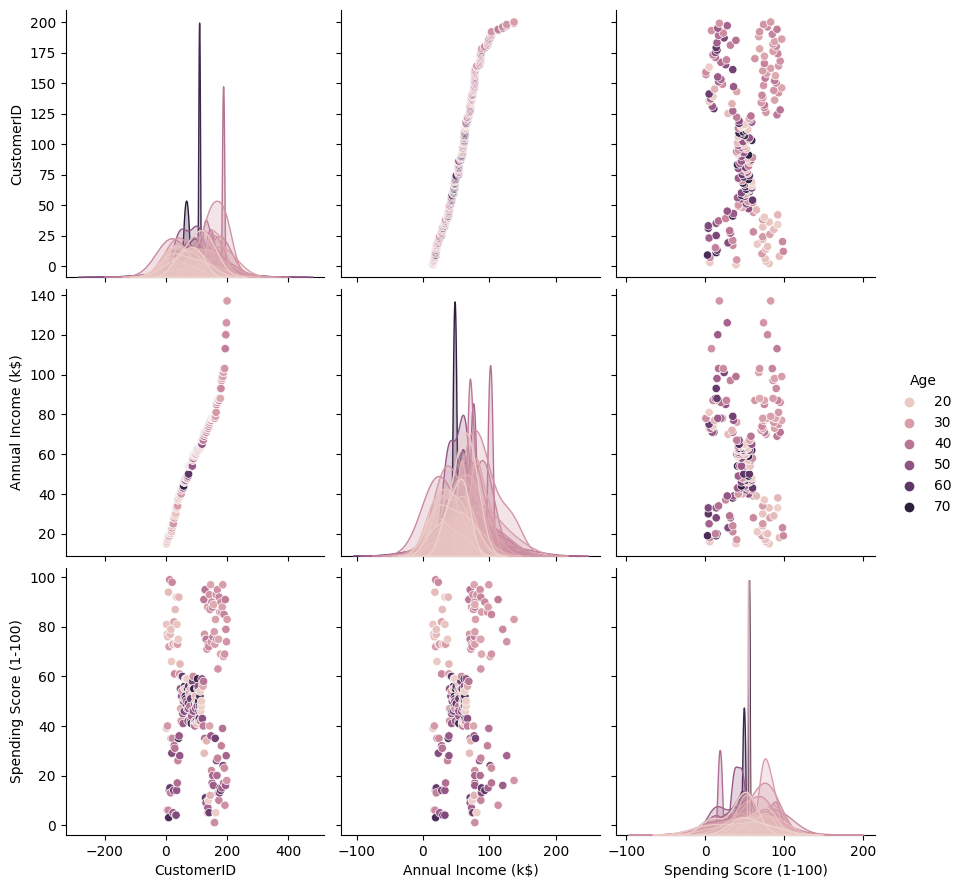

In [147]:
sns.pairplot(data,hue="Age",height=3)
plt.show()

# 4. Perform descriptive statistics on the dataset.

In [148]:
data['CustomerID'].mean()

100.5

In [149]:
data['Age'].median()

36.0

In [150]:
data['Gender'].mode()

0    Female
Name: Gender, dtype: object

In [151]:
data.skew()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6500\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [152]:
data.kurt()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6500\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [153]:
data.std()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6500\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# 5. Check for Missing values and deal with them.

In [154]:
data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [155]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 6. Find the outliers and replace them outliers

<AxesSubplot: >

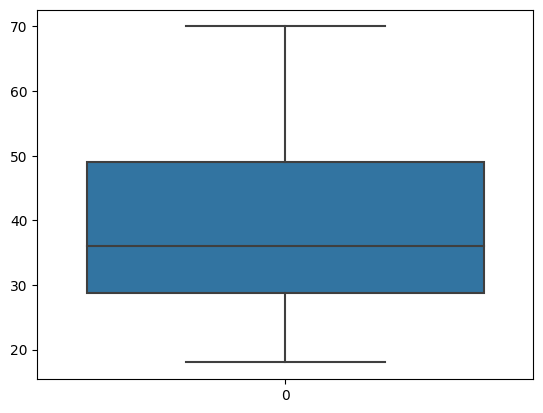

In [156]:
sns.boxplot(data.Age)

<AxesSubplot: ylabel='Age'>

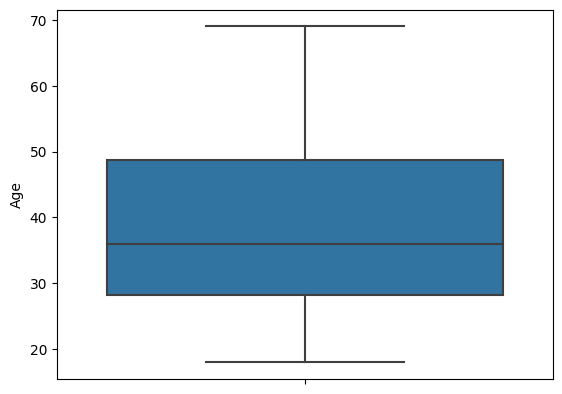

In [157]:
dat=data[data['Age']<70]
sns.boxplot(y='Age',data=dat)

In [158]:
Q1=data.CustomerID.quantile(0.25)
Q2=data.CustomerID.quantile(0.75)
IQR=Q2-Q1
print(IQR)

99.5


In [159]:
data=data[~((data.CustomerID<Q1-1.5*IQR))|(data.CustomerID>(Q2+1.5*IQR))]
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 7. Check for Categorical columns and perform encoding

In [160]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# 8. Scale the independent variables

In [161]:

from sklearn import preprocessing
x=data.iloc[:,2:4].values
print("\nOriginal values: \n",x)


Original values: 
 [[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 

In [162]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print("\nAfter min max Scaling : \n",x_after_min_max_scaler)



After min max Scaling : 
 [[0.01923077 0.        ]
 [0.05769231 0.        ]
 [0.03846154 0.00819672]
 [0.09615385 0.00819672]
 [0.25       0.01639344]
 [0.07692308 0.01639344]
 [0.32692308 0.02459016]
 [0.09615385 0.02459016]
 [0.88461538 0.03278689]
 [0.23076923 0.03278689]
 [0.94230769 0.03278689]
 [0.32692308 0.03278689]
 [0.76923077 0.04098361]
 [0.11538462 0.04098361]
 [0.36538462 0.04098361]
 [0.07692308 0.04098361]
 [0.32692308 0.04918033]
 [0.03846154 0.04918033]
 [0.65384615 0.06557377]
 [0.32692308 0.06557377]
 [0.32692308 0.07377049]
 [0.13461538 0.07377049]
 [0.53846154 0.08196721]
 [0.25       0.08196721]
 [0.69230769 0.10655738]
 [0.21153846 0.10655738]
 [0.51923077 0.10655738]
 [0.32692308 0.10655738]
 [0.42307692 0.1147541 ]
 [0.09615385 0.1147541 ]
 [0.80769231 0.12295082]
 [0.05769231 0.12295082]
 [0.67307692 0.14754098]
 [0.         0.14754098]
 [0.59615385 0.14754098]
 [0.05769231 0.14754098]
 [0.46153846 0.1557377 ]
 [0.23076923 0.1557377 ]
 [0.34615385 0.18032787

In [163]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print("\nAfter Standardisation : \n",x_after_Standardisation)


After Standardisation : 
 [[-1.42456879 -1.73899919]
 [-1.28103541 -1.73899919]
 [-1.3528021  -1.70082976]
 [-1.13750203 -1.70082976]
 [-0.56336851 -1.66266033]
 [-1.20926872 -1.66266033]
 [-0.27630176 -1.62449091]
 [-1.13750203 -1.62449091]
 [ 1.80493225 -1.58632148]
 [-0.6351352  -1.58632148]
 [ 2.02023231 -1.58632148]
 [-0.27630176 -1.58632148]
 [ 1.37433211 -1.54815205]
 [-1.06573534 -1.54815205]
 [-0.13276838 -1.54815205]
 [-1.20926872 -1.54815205]
 [-0.27630176 -1.50998262]
 [-1.3528021  -1.50998262]
 [ 0.94373197 -1.43364376]
 [-0.27630176 -1.43364376]
 [-0.27630176 -1.39547433]
 [-0.99396865 -1.39547433]
 [ 0.51313183 -1.3573049 ]
 [-0.56336851 -1.3573049 ]
 [ 1.08726535 -1.24279661]
 [-0.70690189 -1.24279661]
 [ 0.44136514 -1.24279661]
 [-0.27630176 -1.24279661]
 [ 0.08253169 -1.20462718]
 [-1.13750203 -1.20462718]
 [ 1.51786549 -1.16645776]
 [-1.28103541 -1.16645776]
 [ 1.01549866 -1.05194947]
 [-1.49633548 -1.05194947]
 [ 0.7284319  -1.05194947]
 [-1.28103541 -1.05194947]
 

# 9.Perform any of the clustering algorithms

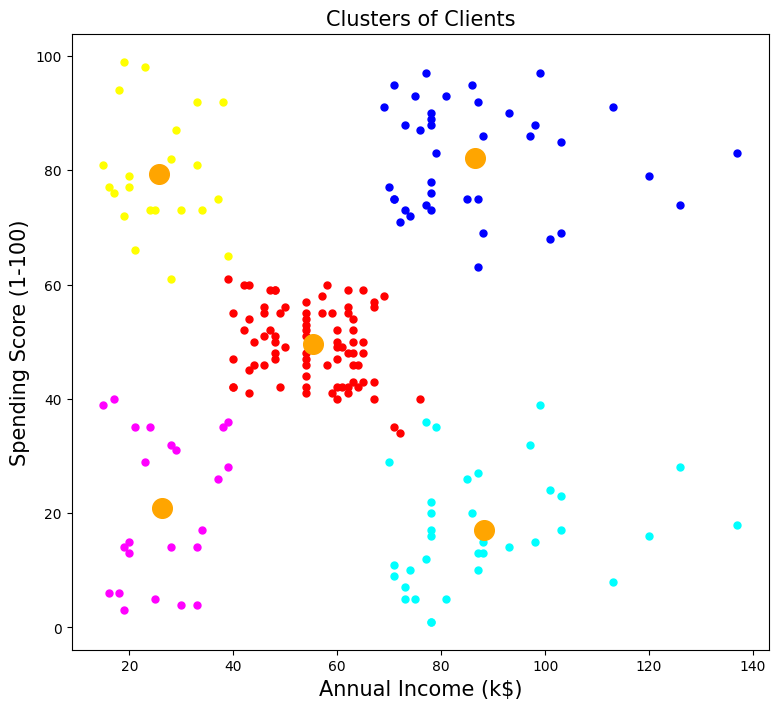

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
target=data.iloc[:,[3,4]]

X =np.array(target)
kmeans = KMeans(n_clusters = 5,max_iter =500, n_init =10, random_state = 0 )
kmeans_preds = kmeans.fit_predict(X)
point_size = 25 
colors =['cyan','red','blue','yellow','magenta']
labels=['Careful','Standard','Target','Careless','Sensible']
plt.figure(figsize = (9,8) )

for i in range(5):
    plt.scatter(X[kmeans_preds == i,0],X[kmeans_preds == i,1],s = point_size,c=colors[i],label = labels[i])

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='orange',label = 'Centroids')
plt.title('Clusters of Clients',fontsize=15)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.show()




In [165]:
TWSS=[]
k= list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [166]:
TWSS

[387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157505.72072477575,
 122630.44175335608,
 103151.40750360748,
 86053.67444777445]

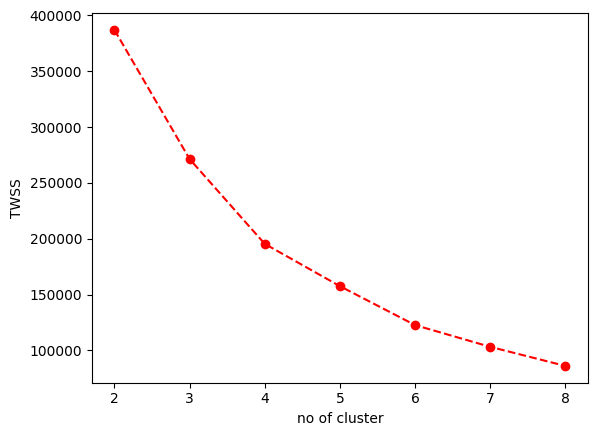

In [167]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')
plt.show()



In [168]:
model=KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

# 10.Add the cluster data with the primary dataset

In [169]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [170]:
mb=pd.Series(model.labels_)
data['clust']=mb
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2


In [171]:
data.tail(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
197,198,0,32,126,74,3
198,199,0,32,137,18,0
199,200,0,30,137,83,3


# 11.Split the data into dependent and independent variables.

In [172]:
dmain=pd.get_dummies(data,columns=['Gender'])
dmain

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clust,Gender_0,Gender_1
0,1,19,15,39,2,1,0
1,2,21,15,81,2,1,0
2,3,20,16,6,2,0,1
3,4,23,16,77,2,0,1
4,5,31,17,40,2,0,1
...,...,...,...,...,...,...,...
195,196,35,120,79,3,0,1
196,197,45,126,28,0,0,1
197,198,32,126,74,3,1,0
198,199,32,137,18,0,1,0


In [173]:
y=dmain['Age']
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [174]:
x=dmain.drop(columns='Age',axis=1)
x.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),clust,Gender_0,Gender_1
0,1,15,39,2,1,0
1,2,15,81,2,1,0
2,3,16,6,2,0,1
3,4,16,77,2,0,1
4,5,17,40,2,0,1


# 12. Split the data into training and testing

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 13.Build the Model

In [176]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# 14.Train the Model

In [177]:
x_train

,CustomerID,Annual Income (k$),Spending Score (1-100),clust,Gender_0,Gender_1
134,135,73,5,0,1,0
66,67,48,50,1,0,1
26,27,28,32,2,0,1
113,114,64,46,1,1,0
168,169,87,27,0,0,1
...,...,...,...,...,...,...
67,68,48,48,1,0,1
192,193,113,8,0,1,0
117,118,65,59,1,0,1
47,48,40,47,2,0,1


In [178]:
y_train

134    20
66     43
26     45
113    19
168    36
       ..
67     68
192    33
117    49
47     27
172    36
Name: Age, Length: 160, dtype: int64

# 15.Test the model

In [179]:
x_test

,CustomerID,Annual Income (k$),Spending Score (1-100),clust,Gender_0,Gender_1
18,19,23,29,2,1,0
170,171,87,13,0,1,0
107,108,63,46,1,1,0
98,99,61,42,1,1,0
177,178,88,69,3,1,0
182,183,98,15,0,1,0
5,6,17,76,2,0,1
146,147,77,36,0,1,0
12,13,20,15,2,0,1
152,153,78,20,0,0,1


In [180]:
y_test

18     52
170    40
107    54
98     48
177    27
182    46
5      22
146    48
12     58
152    44
61     19
125    31
180    37
154    47
80     57
7      23
33     18
130    47
37     30
74     59
183    29
145    28
45     24
159    30
60     70
123    39
179    35
185    30
122    40
44     49
16     35
55     47
150    43
111    19
22     46
189    36
129    38
4      31
83     46
106    66
Name: Age, dtype: int64

# 16.Measure the performance using Evaluation Metrics

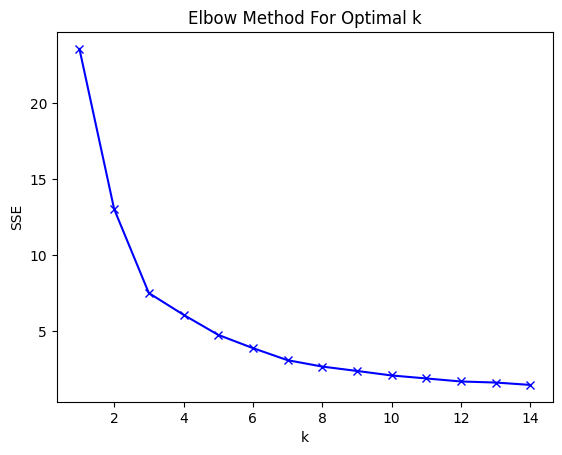

In [183]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
data_x = data.iloc[:,2:4]
data_x.head() 
x_array = np.array(data_x)
scaler =preprocessing.MinMaxScaler() 
x_scaled =scaler.fit_transform(x_array)
x_scaled 
Sum_of_squared_distances=[]
K = range(1,15) 
for k in K: 
    km=KMeans(n_clusters=k)
    km= km.fit(x_scaled) 
    Sum_of_squared_distances.append(km.inertia_) 
plt.plot(K,Sum_of_squared_distances,'bx-') 
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k') 
plt.show()